In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data Set Definition

In [17]:
features = np.array([[-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,1,1,-1,1,1,1],
                    [1,1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1],
                    [-1,-1,1,1,1,1,1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,1,1,-1],
                    [1,1,1,1,1,-1,-1, -1,1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,-1,1, -1,1,-1,-1,-1,-1,1, -1,1,-1,-1,-1,-1,1, -1,1,-1,-1,-1,-1,1, -1,1,-1,-1,-1,-1,1, -1,1,-1,-1,-1,1,-1, 1,1,1,1,1,-1,-1],
                    [1, 1,  1,  1,  1,  1,  1, -1, 1, -1, -1, -1, -1,  1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1,  1, -1, -1, -1, -1, 1,  1,  1, -1, -1, -1, -1, 1, -1,  1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1,  1, 1, 1,  1,  1,  1,  1,  1],
                    [-1,-1,-1,1,1,1,1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,1,-1, -1,-1,1,1,1,-1,-1],
                    [1,1,1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,1,1,-1,-1,1,1],
                    [-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1],
                    [1,1,1,1,1,1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1],
                    [-1,-1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1],
                    [1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1],
                    [1,1,1,1,1,1,1, 1,-1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,1,1,1,1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,1,1,1,1,1,1],
                    [-1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,1,-1, -1,-1,1,1,1,-1,-1],
                    [1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1],
                    [-1,-1,-1,1,-1,-1,-1, -1,-1,-1,1,-1,-1,-1, -1,-1,1,-1,1,-1,-1, -1,-1,1,-1,1,-1,-1, -1,1,-1,-1,-1,1,-1, -1,1,1,1,1,1,-1, 1,-1,-1,-1,-1,-1,1, 1,-1,-1,-1,-1,-1,1, 1,1,-1,-1,-1,1,1],
                     [1,1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1],
                     [-1,-1,1,1,1,-1,1,-1,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1],
                     [1,1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1],
                      [1,1,1,1,1,1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,1,1,1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,1],
                     [-1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1],
                     [1,1,1,-1,-1,1,1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,1,1,-1,-1,1,1]
                    ,[-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,1,1,-1,1,1,1],
                    [-1,1,1,1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1],
                    [-1,-1,1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,1,1,-1],
                    [1,1,1,1,1,-1,-1, -1,1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,1,1, -1,1,-1,-1,-1,-1,1, 1,1,-1,-1,-1,-1,-1, -1,1,-1,-1,-1,-1,1, -1,1,-1,-1,-1,-1,1, -1,1,-1,-1,-1,1,-1, 1,1,1,1,1,-1,-1],
                    [1, 1,  1,  1,  1,  1,  1, -1, 1, -1, -1, -1, -1,  1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1,  -1, -1, -1, -1, -1, 1,  1,  1, -1, -1, -1, -1, 1, -1,  1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1,  1, 1, 1,  1,  1,  1,  1,  1],
                    [-1,-1,-1,1,1,1,1, -1,-1,-1,-1,-1,-1,-1, -1,-1,-1,-1,-1,1,1, -1,-1,-1,-1,-1,1,1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,1,-1, -1,1,-1,-1,-1,1,-1, -1,-1,1,1,1,-1,-1],
                    [1,1,1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,1,1,-1,-1,1,1],
                    [-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,1,1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1],
                    [1,1,1,1,1,1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,1,1,1,1,1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1],
                    [-1,-1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1],
                    [1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,1,1,1,1,1,-1,-1],
                    [1,1,1,1,1,1,1, 1,-1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,1,1,1,1,-1,-1, 1,-1,-1,-1,-1,-1,-1, 1,-1,-1,-1,-1,-1,1, -1,-1,-1,1,-1,-1,-1, 1,1,1,1,1,1,1],
                    [-1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,-1,1,-1, -1,-1,-1,-1,1,-1,-1, -1,1,-1,-1,-1,1,-1, -1,-1,1,1,1,-1,-1],
                    [1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1],
                    [-1,-1,-1,1,-1,-1,-1, -1,-1,-1,1,-1,-1,-1, -1,-1,1,-1,1,-1,-1, -1,-1,1,-1,1,-1,-1, -1,1,-1,-1,-1,1,-1, -1,1,1,1,1,1,-1, 1,-1,-1,-1,-1,-1,1, -1,-1,-1,-1,-1,-1,1, 1,1,-1,-1,-1,1,1],
                     [1,1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,1,1,-1,-1,-1,-1,1,1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,-1],
                     [-1,-1,1,1,1,-1,1,-1,1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1],
                     [1,1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,1,-1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,1,1,1,1,1,-1,-1],
                      [1,1,1,1,1,1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,1,1,1,1,1,1,1,1],
                     [-1,-1,-1,-1,1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1],
                     [1,1,1,-1,-1,1,1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,1,-1,1,-1,1,-1,1,1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,1,1,-1,-1,1,1]])
labels = np.array([0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6])

In [18]:
print(features.shape)

(42, 63)


In [19]:
labels.shape

(42,)

In [20]:
features = np.reshape(features, (42, 9, 7))

In [22]:
labels = np.reshape(labels, (42,1))

In [23]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train, x_test, y_train, y_test = train_test_split(features,labels,test_size = 0.33)

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (9,7)), 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 63)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4096      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 7)                 455       
                                                                 
Total params: 8,711
Trainable params: 8,711
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [27]:
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10,batch_size=32)

Epoch 1/10
1/1 [==============================] - 1s 886ms/step - loss: 2.0343 - accuracy: 0.1071 - val_loss: 8.4984 - val_accuracy: 0.1429
Epoch 2/10
1/1 [==============================] - 0s 79ms/step - loss: 2.8702 - accuracy: 0.6429 - val_loss: 5.6505 - val_accuracy: 0.3571
Epoch 3/10
1/1 [==============================] - 0s 38ms/step - loss: 9.0442 - accuracy: 0.2857 - val_loss: 1.6829 - val_accuracy: 0.5714
Epoch 4/10
1/1 [==============================] - 0s 60ms/step - loss: 1.7384 - accuracy: 0.7500 - val_loss: 2.4469 - val_accuracy: 0.6429
Epoch 5/10
1/1 [==============================] - 0s 61ms/step - loss: 1.9415 - accuracy: 0.7500 - val_loss: 1.3497 - val_accuracy: 0.6429
Epoch 6/10
1/1 [==============================] - 0s 55ms/step - loss: 0.8048 - accuracy: 0.8214 - val_loss: 1.0076 - val_accuracy: 0.5714
Epoch 7/10
1/1 [==============================] - 0s 63ms/step - loss: 0.5976 - accuracy: 0.8214 - val_loss: 0.6202 - val_accuracy: 0.7857
Epoch 8/10
1/1 [==========

In [28]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

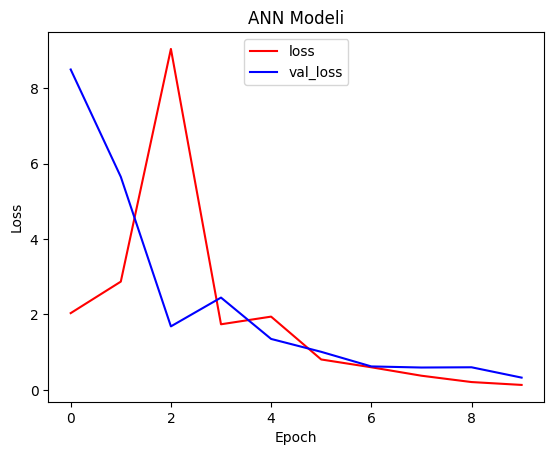

In [68]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('ANN Modeli')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(r.history['loss'],'r-', label = 'loss')
plt.plot(r.history['val_loss'],'b-', label = 'val_loss')
leg = plt.legend(loc='upper center')

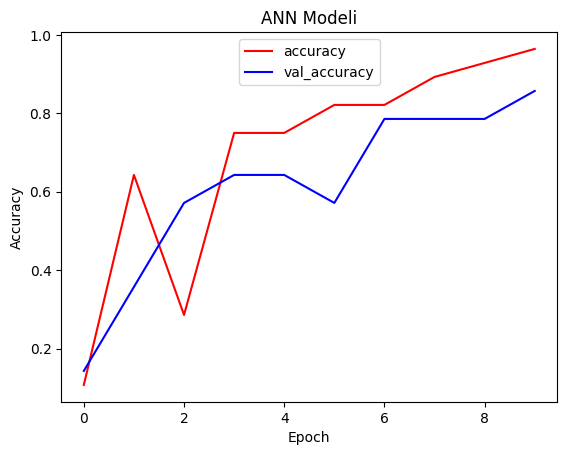

In [69]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('ANN Modeli')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(r.history['accuracy'],'r-', label = 'accuracy')
plt.plot(r.history['val_accuracy'],'b-', label = 'val_accuracy')
leg = plt.legend(loc='upper center')

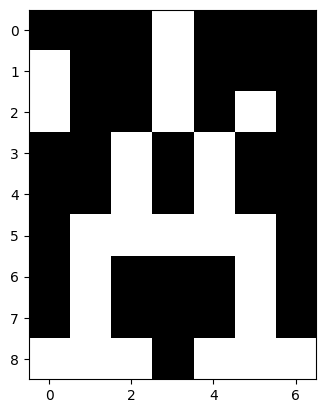

In [31]:
featuresDeneme = np.array([[[-1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,1,1,1,1,1,-1,-1,1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,1,1,-1,1,1,1]]])
featuresDeneme = np.reshape(featuresDeneme,(1,9,7))
plt.imshow(featuresDeneme[0], cmap="gray")

In [32]:
x_test.shape

(14, 9, 7)

In [33]:
#model.evaluate(featuresDeneme,0)
#prediction = model.predict(featuresDeneme)
prediction = model.predict(x_test)

1/1 [==============================] - 0s 138ms/step


In [34]:
np.argmax(prediction[0])

5

In [35]:
np.argmax(prediction[1])

3

In [36]:
np.argmax(prediction[2])

5

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
y_prediction = model.predict(x_test)

1/1 [==============================] - 0s 50ms/step


In [39]:
x_test[0]

array([[-1, -1, -1, -1,  1,  1,  1],
       [-1, -1, -1, -1, -1,  1, -1],
       [-1, -1, -1, -1, -1,  1, -1],
       [-1, -1, -1, -1, -1,  1, -1],
       [-1, -1, -1, -1, -1,  1, -1],
       [-1, -1, -1, -1, -1,  1, -1],
       [-1, -1, -1, -1, -1,  1, -1],
       [-1,  1, -1, -1, -1,  1, -1],
       [-1, -1,  1,  1,  1, -1, -1]])

In [40]:
y_prediction = np.argmax(y_prediction, axis = 1)

In [41]:

result = confusion_matrix(y_test, y_prediction)
print(result)

[[1 0 0 0 0 0]
 [0 2 0 1 0 0]
 [0 0 3 1 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 1]]


In [42]:
y_prediction

array([5, 3, 5, 4, 2, 5, 4, 3, 2, 0, 4, 6, 4, 3], dtype=int64)

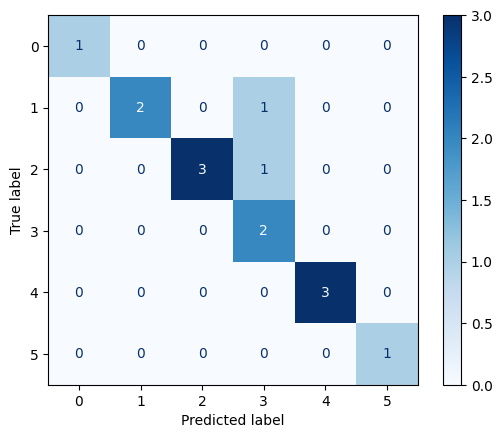

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

#labels = ["a", "b", "c", "d", "e", "j", "k"]
#, display_labels=labels
disp = ConfusionMatrixDisplay(confusion_matrix=result)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [76]:
recall = recall_score(y_test, y_prediction,average='macro')
print('Recall: %f' % recall)

Recall: 0.902778


In [77]:
precision = precision_score(y_test, y_prediction,average='macro') 
#"ağırlıklı", her sınıfın puanının gerçek veri örneğindeki varlığına göre ağırlıklandırıldığı ikili metriklerin ortalamasını hesaplayarak sınıf dengesizliğini açıklar
print('Precision : %f' % precision)

Precision : 0.916667


In [78]:
f1 = f1_score(y_test, y_prediction,average='macro')
print('F1 score: %f' % f1)

F1 score: 0.887302


In [79]:
accuracy = accuracy_score(y_test, y_prediction)
print('Accuracy: %f' % accuracy)

Accuracy: 0.857143


In [52]:
y_prediction

array([5, 3, 5, 4, 2, 5, 4, 3, 2, 0, 4, 6, 4, 3], dtype=int64)

In [53]:
y_test

array([[5],
       [3],
       [5],
       [2],
       [2],
       [5],
       [4],
       [3],
       [2],
       [0],
       [4],
       [6],
       [3],
       [3]])

C:\Users\büşrasalihoğlu\Desktop\notebookvenv\venv\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

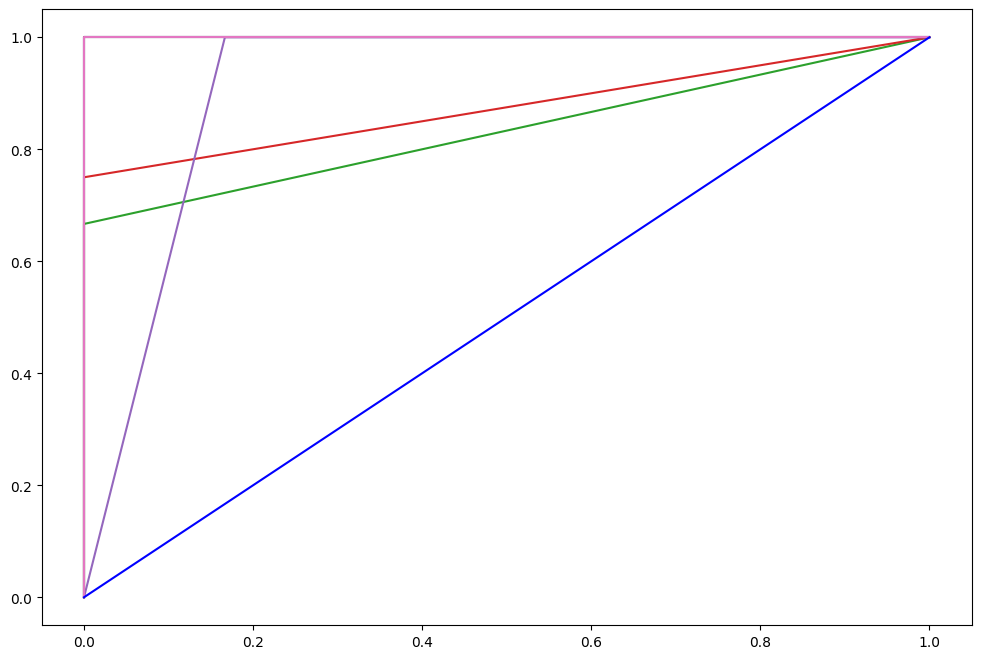

In [58]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ["a", "b", "c", "d", "e", "j", "k"]

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    y_test = tf.keras.utils.to_categorical(y_test,7)
    y_pred = tf.keras.utils.to_categorical(y_pred,7)
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_prediction))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()